# Credit Card Fraud Detection

# TASK 2

## Dataset Overview
This dataset contains movie plot descriptions labeled with genres.
The goal is to classify movies into genres based on text.

Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

Load The data 

In [4]:
train_df = pd.read_csv('/Users/jayashar/Desktop/Machine Learning Intership/Task2_Credit_Card_Fraud_Detection/data/fraudTest.csv')
test_df = pd.read_csv('/Users/jayashar/Desktop/Machine Learning Intership/Task2_Credit_Card_Fraud_Detection/data/fraudTrain.csv')

train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/20 12:14,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/68,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/20 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/90,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/20 12:14,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/70,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/20 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/87,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/20 12:15,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/55,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
train_df.shape

(555719, 23)

In [7]:
train_df.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time        cc_num  \
0                0        21/06/20 12:14  2.291164e+15   
1                1        21/06/20 12:14  3.573030e+15   
2                2        21/06/20 12:14  3.598215e+15   
3                3        21/06/20 12:15  3.591920e+15   
4                4        21/06/20 12:15  3.526826e+15   
...            ...                   ...           ...   
555714      555714        31/12/20 23:59  3.056060e+13   
555715      555715        31/12/20 23:59  3.556613e+15   
555716      555716        31/12/20 23:59  6.011724e+15   
555717      555717        31/12/20 23:59  4.079770e+12   
555718      555718        31/12/20 23:59  4.170689e+15   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Ni

In [8]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
train_df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [8]:
cols_to_drop = [
    'Unnamed: 0',
    'trans_num',
    'cc_num',
    'first',
    'last',
    'street',
    'dob',
    'trans_date_trans_time'
]

train_df = train_df.drop(columns = cols_to_drop)
test_df = test_df.drop(columns = cols_to_drop)

In [9]:
train_df.isnull().sum()

merchant      0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

Separate Numerical vs Categorical Columns

In [11]:
categorical_cols = train_df.select_dtypes(include = 'object').columns
numerical_cols = train_df.select_dtypes(exclude = 'object').columns

print("Categorical Columns :\n",categorical_cols)
print("\nNumerical Columns :\n",numerical_cols)

Categorical Columns :
 Index(['merchant', 'category', 'gender', 'city', 'state', 'job'], dtype='object')

Numerical Columns :
 Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


 Label Encoding 

In [12]:
label_encoder = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoder[col] = le

Split Features & Target

In [13]:
X = train_df.drop('is_fraud',axis =1)
y = train_df['is_fraud']

Train / Validation Split

In [16]:
X_train , X_val , y_train , y_val = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y,
)

print("Train shape:",X_train.shape)
print("Validation shape:",X_val.shape)

Train shape: (444575, 14)
Validation shape: (111144, 14)


In [18]:
from sklearn.linear_model import LogisticRegression

fraud_lr = LogisticRegression(
    max_iter = 1000,
    class_weight = 'balanced',
    random_state = 42
)
fraud_lr.fit(X_train , y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [19]:
y_val_pred_lr = fraud_lr.predict(X_val)

=== Logistic Regression : Validation Perfomance ===
 
Accuarcy: 0.9524040883898366
Precission: 0.05784973621975623
Recall: 0.7412587412587412
F1 Score 0.10732365845426932

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    110715
           1       0.06      0.74      0.11       429

    accuracy                           0.95    111144
   macro avg       0.53      0.85      0.54    111144
weighted avg       1.00      0.95      0.97    111144



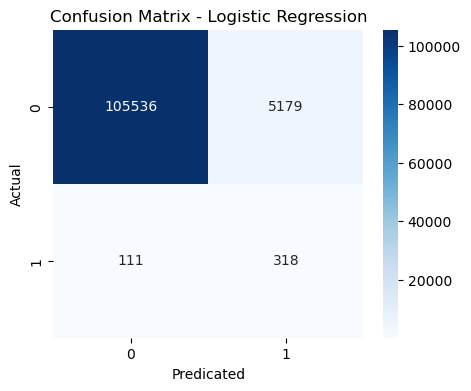

In [25]:
from sklearn.metrics import confusion_matrix

print("=== Logistic Regression : Validation Perfomance ===\n ")
print("Accuarcy:",accuracy_score(y_val,y_val_pred_lr))
print("Precission:",precision_score(y_val,y_val_pred_lr))
print("Recall:",recall_score(y_val,y_val_pred_lr))
print("F1 Score",f1_score(y_val,y_val_pred_lr))

print("\nClassification Report:\n")
print(classification_report(y_val,y_val_pred_lr , zero_division = 0))

cm = confusion_matrix(y_val,y_val_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm , annot =True , fmt = 'd', cmap = 'Blues')
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

 Train a Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

fraud_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

fraud_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [29]:
y_val_pred_rf = fraud_rf.predict(X_val)

=== Random Forest : Validation Performance ===

Accuracy: 0.9982815086734327
Precision: 0.9190140845070423
Recall: 0.6083916083916084
F1 Score: 0.7321178120617111

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.92      0.61      0.73       429

    accuracy                           1.00    111144
   macro avg       0.96      0.80      0.87    111144
weighted avg       1.00      1.00      1.00    111144



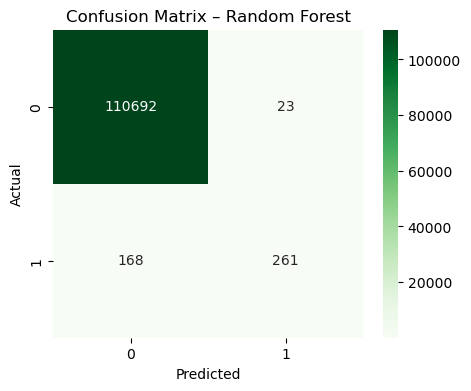

In [30]:
from sklearn.metrics import confusion_matrix

print("=== Random Forest : Validation Performance ===\n")

print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Precision:", precision_score(y_val, y_val_pred_rf))
print("Recall:", recall_score(y_val, y_val_pred_rf))
print("F1 Score:", f1_score(y_val, y_val_pred_rf))

print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred_rf, zero_division=0))

cm_rf = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

## Model Comparison

Logistic Regression achieved higher recall, meaning it detected more
fraudulent transactions, but with a higher number of false positives.

Random Forest showed improved precision, reducing false alarms, while
maintaining reasonable recall.

Depending on business requirements, Random Forest may be preferred when
reducing false positives is important, while Logistic Regression may be
chosen when maximizing fraud detection is the priority.

## Conclusion

In this project, a credit card fraud detection system was developed using
supervised machine learning techniques. The dataset was highly
imbalanced, making accuracy an unreliable metric on its own.

A Logistic Regression model was first trained as a baseline to maximize
fraud recall. A Random Forest classifier was then applied to capture
non-linear patterns and improve precision.

The results demonstrate the importance of selecting appropriate
evaluation metrics and models when dealing with real-world fraud
detection problems.